# Project : car price prediction

## Import dataset

In [2]:
import pandas as pd
import numpy as np

col_names = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-rate','horsepower','peak-rpm','city-mpg','highway-mpg','price']
cars = pd.read_csv('imports-85.data', names=col_names)
numerical = ['normalized-losses','wheel-base','length','width','height','curb-weight','bore','stroke','compression-rate','horsepower','peak-rpm','city-mpg','highway-mpg','price']
num_cars = cars[numerical]
num_cars

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95,109.1,188.8,68.9,55.5,2952,3.78,3.15,9.5,114,5400,23,28,16845
201,95,109.1,188.8,68.8,55.5,3049,3.78,3.15,8.7,160,5300,19,25,19045
202,95,109.1,188.8,68.9,55.5,3012,3.58,2.87,8.8,134,5500,18,23,21485
203,95,109.1,188.8,68.9,55.5,3217,3.01,3.40,23.0,106,4800,26,27,22470


## Cleaning data

In [15]:
#replace all '?'
num_cars = num_cars.replace('?', np.nan)
num_cars.dtypes
num_cars = num_cars.astype(float)
num_cars.dtypes
#num_cars['normalized-losses'].isnull().value_counts()
#num_cars = num_cars.drop(['normalized-losses'], axis=1)

#check and take out NAs
num_cars['bore'].fillna((num_cars['bore'].mean()), inplace=True)
num_cars['stroke'].fillna((num_cars['stroke'].mean()), inplace=True)
num_cars['horsepower'].fillna((num_cars['horsepower'].mean()), inplace=True)
num_cars['peak-rpm'].fillna((num_cars['peak-rpm'].mean()), inplace=True)
num_cars['price'].fillna((num_cars['price'].mean()), inplace=True)
num_cars[num_cars.isnull().any(axis=1)]

num_cars.head()

,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,94.5,171.2,65.5,52.4,2823.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,99.8,176.6,66.2,54.3,2337.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,99.4,176.6,66.4,54.3,2824.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [28]:
#normalize
from sklearn import preprocessing

x = num_cars.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
norm_cars = pd.DataFrame(x_scaled, columns = num_cars.columns)
norm_cars['price'] = num_cars['price']
norm_cars

,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.058309,0.413433,0.316667,0.083333,0.411171,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474,13495.0
1,0.058309,0.413433,0.316667,0.083333,0.411171,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474,16500.0
2,0.230321,0.449254,0.433333,0.383333,0.517843,0.100000,0.666667,0.12500,0.441667,0.346939,0.166667,0.263158,16500.0
3,0.384840,0.529851,0.491667,0.541667,0.329325,0.464286,0.633333,0.18750,0.225000,0.551020,0.305556,0.368421,13950.0
4,0.373178,0.529851,0.508333,0.541667,0.518231,0.464286,0.633333,0.06250,0.279167,0.551020,0.138889,0.157895,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.655977,0.711940,0.716667,0.641667,0.567882,0.885714,0.514286,0.15625,0.275000,0.510204,0.277778,0.315789,16845.0
201,0.655977,0.711940,0.708333,0.641667,0.605508,0.885714,0.514286,0.10625,0.466667,0.469388,0.166667,0.236842,19045.0
202,0.655977,0.711940,0.716667,0.641667,0.591156,0.742857,0.380952,0.11250,0.358333,0.551020,0.138889,0.184211,21485.0
203,0.655977,0.711940,0.716667,0.641667,0.670675,0.335714,0.633333,1.00000,0.241667,0.265306,0.361111,0.289474,22470.0


### Univariate model

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

def knn_train_test(col_name, col_target, df):
    train, test = train_test_split(norm_cars, test_size=0.25)
    knn = KNeighborsRegressor()
    knn.fit(train[[col_name]], train[[col_target]])
    labels = knn.predict(test[[col_name]])
    mse_test = mean_squared_error(test[[col_target]],labels)
    rmse = np.sqrt(mse_test)
    #acc = accuracy_score(test[[col_target]], labels)
    return (rmse)
    

In [108]:
knn_train_test('horsepower','price',norm_cars)

4583.278279547054

In [113]:
#function with K variation
def knn_train_test_k(col_name, col_target, df):
    train, test = train_test_split(norm_cars, test_size=0.25)
    k_values=[1,3,5,7]
    k_rmses= {}
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train[[col_name]], train[[col_target]])
        labels = knn.predict(test[[col_name]])
        mse_test = mean_squared_error(test[[col_target]],labels)
        iteration_one_rmse = np.sqrt(mse_test)
        k_rmses[k] = iteration_one_rmse
    return k_rmses
    

In [115]:
#RMSEs for K[1,3,5,7] per column
feature_k_rmse_results = {}
train_cols = num_cars.columns.drop('price')
for col in train_cols :
    rmse_val = knn_train_test_k(col, 'price', norm_cars)
    feature_k_rmse_results[col] =rmse_val
feature_k_rmse_results

{'wheel-base': {1: 4509.450199517578,
  3: 5360.4927255376115,
  5: 5376.267954424027,
  7: 5425.623027328079},
 'length': {1: 6150.607759519249,
  3: 7076.143323972939,
  5: 5405.179649587459,
  7: 4869.01502535188},
 'width': {1: 5561.159259353415,
  3: 4479.470907159791,
  5: 4678.669476335819,
  7: 4426.901279874281},
 'height': {1: 9849.046532101496,
  3: 7727.870119014157,
  5: 7447.521995443626,
  7: 7602.960922525679},
 'curb-weight': {1: 4075.20188021371,
  3: 4699.199130505727,
  5: 4503.989127645041,
  7: 4303.930735517301},
 'bore': {1: 8740.700283697091,
  3: 6681.397154153547,
  5: 6955.210956949163,
  7: 7424.680535143273},
 'stroke': {1: 8526.020090962751,
  3: 6643.712037746731,
  5: 7055.432365136162,
  7: 7574.3260679280365},
 'compression-rate': {1: 6224.551477581195,
  3: 5912.048772287731,
  5: 6646.501238761005,
  7: 5957.330673504688},
 'horsepower': {1: 5270.667664509854,
  3: 4701.664561894669,
  5: 4091.026804746288,
  7: 3971.389207470675},
 'peak-rpm': {1: 

wheel-base
average rmse:5167.958476701824
length
average rmse:5875.236439607882
width
average rmse:4786.550230680827
height
average rmse:8156.84989227124
curb-weight
average rmse:4395.580218470444
bore
average rmse:7450.497232485769
stroke
average rmse:7449.87264044342
compression-rate
average rmse:6185.108040533654
horsepower
average rmse:4508.687059655372
peak-rpm
average rmse:7763.824729775372
city-mpg
average rmse:5546.0271130793335
highway-mpg
average rmse:5620.220016752285


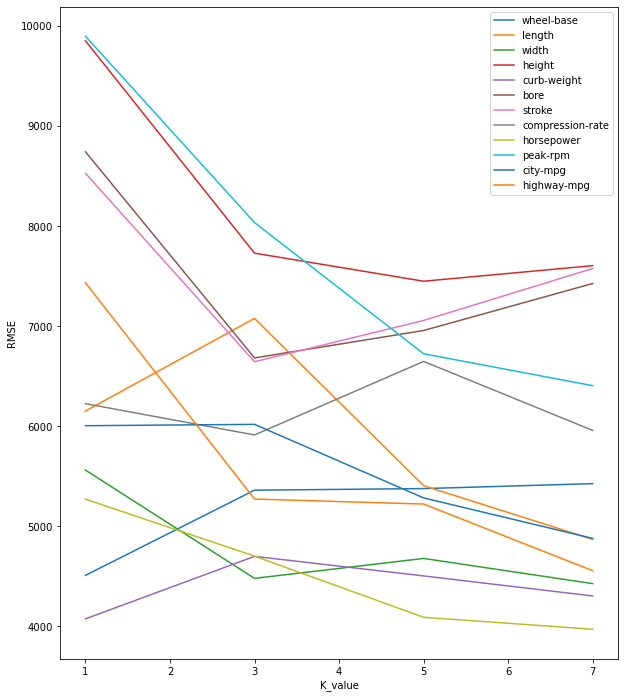

In [118]:
#plot RMSEs
import matplotlib.pyplot as plt

best_features = {}
plt.figure(figsize=(10,12))
for key, value in feature_k_rmse_results.items():
    x = list(value.keys())
    y= list(value.values())
    
    order = np.argsort(x)
    x_ordered = np.array(x)[order]
    y_ordered = np.array(y)[order]
    print(key)
    print('average rmse:' +str(np.mean(y)))
    best_features[key] = np.mean(y)
    plt.plot(x_ordered, y_ordered, label=key)
    plt.xlabel('K_value')
    plt.ylabel('RMSE')
plt.legend()
plt.show()

In [124]:
#sort by smallest to biggest RMSE
sort_values = sorted(best_features, key=best_features.get)
sort_values

['curb-weight',
 'horsepower',
 'width',
 'wheel-base',
 'city-mpg',
 'highway-mpg',
 'length',
 'compression-rate',
 'stroke',
 'bore',
 'peak-rpm',
 'height']